## Обзор данных

Импортируем библиотеку pandas и ознакомимся с исходными данными.

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from scipy import stats as st

calls_df = pd.read_csv('/datasets/calls.csv')
#calls_df = pd.read_csv('calls.csv')

internet_df = pd.read_csv('/datasets/internet.csv')
#internet_df = pd.read_csv('internet.csv')

messages_df = pd.read_csv('/datasets/messages.csv')
#messages_df = pd.read_csv('messages.csv')

tariffs_df = pd.read_csv('/datasets/tariffs.csv')
#tariffs_df = pd.read_csv('tariffs.csv')

users_df = pd.read_csv('/datasets/users.csv')
#users_df = pd.read_csv('users.csv')

Оценим данные по исходным таблицам, применив для каждой таблицы методы info() и describe().

In [2]:
display(calls_df.head(10))

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


In [3]:
calls_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [4]:
calls_df.describe()

,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


В таблице calls_df пропусков нет. Названия столбцов соответствуют принятым стандартам. Необходимо только изменить форматы столбцов call_date на datetime64 и duration на int и округлить в большую сторону.

In [5]:
display(internet_df.head(10))

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


In [6]:
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [7]:
internet_df.describe()

,Unnamed: 0,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000


В таблице internet_df пропусков нет. В таблице присутствует столбец Unnamed: 0, его можно удалить, так как он не содержит интересующие нас данные. Необходимо также изменить форматы столбцов session_date на datetime64 и mb_used на int,округлив в большую сторону.

In [8]:
display(messages_df.head(10))

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


In [9]:
messages_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


В таблице messages_df пропусков нет. Названия столбцов соответствуют принятым стандартам. Необходимо только изменить формат столбца message_date на datetime64.

In [10]:
display(tariffs_df.head(10))

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [11]:
tariffs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


Таблица с общими данными по исследуемым тарифам. Тут все данные присутствуют и все форматы в норме.

In [12]:
display(users_df.head(10))

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


In [13]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [14]:
users_df.describe()

,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


В таблице users_df пропуски присутствуют, но только в столбце churn_date, где помечена информация об использовании тарица. На момент выгрузки таблицы только 38 пользователей прекратили пользоваться исследуемыми тарифами. Названия столбцов соответствуют принятым стандартам. Необходимо только изменить формат столбцах churn_date и reg_date на datetime64.

## Предобработка данных
### Изменение типов данных

Необходимо привести значения в надлежащий тип.

Для таблице calls_df изменим форматы столбцов call_date на datetime64 и duration на int и округлить в большую сторону.

In [15]:
calls_df['duration'] = np.ceil(calls_df['duration']) # округляем значения столбца duration в большую сторону
calls_df.head(10)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.0,1000
1,1000_1,2018-08-17,0.0,1000
2,1000_2,2018-06-11,3.0,1000
3,1000_3,2018-09-21,14.0,1000
4,1000_4,2018-12-15,6.0,1000
5,1000_5,2018-11-02,0.0,1000
6,1000_6,2018-10-18,0.0,1000
7,1000_7,2018-08-22,19.0,1000
8,1000_8,2018-09-15,19.0,1000
9,1000_9,2018-08-15,0.0,1000


In [16]:
calls_df['duration'] = calls_df['duration'].astype('int') # изменяем тип данных в столбце duration
calls_df['call_date'] = pd.to_datetime(calls_df['call_date'], format='%Y-%m-%dT%H:%M:%S')
calls_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  int64         
 3   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 6.2+ MB


Для таблицы internet_df удалим столбец Unnamed: 0 и изменим форматы столбцов session_date на datetime64 и mb_used на int,округлив в большую сторону.

In [17]:
internet_df = internet_df.drop('Unnamed: 0', axis='columns') #  удаляю столбец
internet_df['session_date'] = pd.to_datetime(internet_df['session_date'], format='%Y-%m-%dT%H:%M:%S')

#internet_df['mb_used'] = internet_df['mb_used'].apply(np.ceil) # округляем значения столбца mb_used в большую сторону
#internet_df['mb_used'] = internet_df['mb_used'].astype('int')
internet_df.head(10)

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000
5,1000_5,399.97,2018-10-02,1000
6,1000_6,540.08,2018-09-07,1000
7,1000_7,415.70,2018-07-11,1000
8,1000_8,505.40,2018-10-08,1000
9,1000_9,345.54,2018-09-03,1000


In [18]:
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            149396 non-null  object        
 1   mb_used       149396 non-null  float64       
 2   session_date  149396 non-null  datetime64[ns]
 3   user_id       149396 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.6+ MB


Для таблицы messages_df изменим формат столбца message_date на datetime64.

In [19]:
messages_df['message_date'] = pd.to_datetime(messages_df['message_date'], format='%Y-%m-%dT%H:%M:%S')

In [20]:
messages_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  object        
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


В таблице users_df пропуски присутствуют, но только в столбце churn_date, где помечена информация об использовании тарица. На момент выгрузки таблицы только 38 пользователей прекратили пользоваться исследуемыми тарифами.Заполним пустые ячейки текущей датой, при нобходимости эту дату можно будет отсечь. Названия столбцов соответствуют принятым стандартам. Необходимо только изменить формат столбцах churn_date и reg_date на datetime64.

In [21]:
users_df['reg_date'] = pd.to_datetime(users_df['reg_date'], format='%Y-%m-%dT%H:%M:%S')

In [22]:
#users_df['churn_date'] = users_df['churn_date'].fillna(datetime.datetime.now().date()) # заполняю пустые ячейки текущей датой

In [23]:
users_df['churn_date'] = pd.to_datetime(users_df['churn_date'], format='%Y-%m-%dT%H:%M:%S')
display(users_df.head(10))

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaT,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaT,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaT,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaT,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaT,Пермь,Василиса,Блинова,2018-03-22,smart


In [24]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   age         500 non-null    int64         
 2   churn_date  38 non-null     datetime64[ns]
 3   city        500 non-null    object        
 4   first_name  500 non-null    object        
 5   last_name   500 non-null    object        
 6   reg_date    500 non-null    datetime64[ns]
 7   tariff      500 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


### Проверка на наличие дубликатов

Проверим исходные таблицы на наличие дубликатов

In [25]:
print ('Дубликатов в таблице calls_df:', calls_df.duplicated().sum())

Дубликатов в таблице calls_df: 0


In [26]:
print ('Дубликатов в таблице internet_df:', internet_df.duplicated().sum())

Дубликатов в таблице internet_df: 0


In [27]:
print ('Дубликатов в таблице messages_df:', messages_df.duplicated().sum())

Дубликатов в таблице messages_df: 0


In [28]:
print ('Дубликатов в таблице users_df:', users_df.duplicated().sum())

Дубликатов в таблице users_df: 0


Краткий вывод по предобработке данных:
* минуты исходящий звонков, исходящий трафик округлены в большую сторону.
* столбца с датами приведены к фотмату datetime64.
* в исходных данных отсутствуют дубликаты.

Других замечаний к исходным данных не замечено.

### Расчет параметров для каждого пользователя

Произведем расчет количества сделанных звонков и израсходованных минут разговора по месяцам. Добавим дополнительный столбец с указанием месяца звонков.

In [29]:
calls_df['month'] = pd.DatetimeIndex(calls_df['call_date']).month

In [30]:
calls_sum = calls_df.groupby(['month','user_id'])[['duration']].sum() # общая продолжительность звонков для каждого пользователя в месяц
calls_sum.columns = ['duration_sum']
calls_sum

duration_sum
month user_id              
1     1005               95
      1032              380
      1045                9
      1055              551
      1071              194
...                     ...
12    1494              418
      1495             1031
      1496              518
      1497              545
      1499              492

[3174 rows x 1 columns]

In [31]:
calls_count = calls_df.groupby(['month','user_id'])[['duration']].count() # количество звонков каждого пользователя
calls_count.columns = ['duration_count']
calls_count

duration_count
month user_id                
1     1005                 15
      1032                 61
      1045                  1
      1055                 64
      1071                 24
...                       ...
12    1494                 62
      1495                155
      1496                 80
      1497                 71
      1499                 69

[3174 rows x 1 columns]

Добавим столбец с указанием месяца для каждого сообщения.

In [32]:
messages_df['month'] = pd.DatetimeIndex(messages_df['message_date']).month

Расчитаем количество сообщений для каждого пользователя по месяцам.

In [33]:
message_count = messages_df.groupby(['month','user_id'])[['id']].count()
message_count.columns = ['message_count']
message_count

message_count
month user_id               
1     1005                 7
      1032                38
      1045                 5
      1055                30
      1071                16
...                      ...
12    1493                78
      1495                84
      1496                51
      1497                17
      1499                66

[2717 rows x 1 columns]

Расчитаем объем израсходованного интернет-трафика по месяцам для каждого пользователя.

In [34]:
internet_df['month'] = pd.DatetimeIndex(internet_df['session_date']).month

In [35]:
internet_sum = internet_df.groupby(['month','user_id'])[['mb_used']].sum()
internet_sum.columns = ['mb_used_sum']
internet_sum

mb_used_sum
month user_id             
1     1005         2727.97
      1032        24127.69
      1045         2346.71
      1055        17090.88
      1071        15604.34
...                    ...
12    1494        17621.21
      1495        23426.76
      1496        20736.15
      1497        19918.60
      1499        13055.58

[3203 rows x 1 columns]

In [36]:
internet_sum['gb_used_sum'] = internet_sum['mb_used_sum']/1024 # получаем траты интернет-трафика в Гб
internet_sum['gb_used_sum'] = np.ceil(internet_sum['gb_used_sum']) # округляем значения столбца mb_used_sum_gb в большую сторону
internet_sum['gb_used_sum'] = internet_sum['gb_used_sum'].astype('int')
internet_sum

mb_used_sum  gb_used_sum
month user_id                          
1     1005         2727.97            3
      1032        24127.69           24
      1045         2346.71            3
      1055        17090.88           17
      1071        15604.34           16
...                    ...          ...
12    1494        17621.21           18
      1495        23426.76           23
      1496        20736.15           21
      1497        19918.60           20
      1499        13055.58           13

[3203 rows x 2 columns]

Создадим таблицу со сводными данными по количеству звонков, сообщений и потраченному трафику по каждому пользователю.

In [37]:
all_data = calls_sum.merge(internet_sum, on=['month','user_id'], how='outer', suffixes=(False,False))
all_data.head()

duration_sum  mb_used_sum  gb_used_sum
month user_id                                        
1     1005             95.0      2727.97          3.0
      1032            380.0     24127.69         24.0
      1045              9.0      2346.71          3.0
      1055            551.0     17090.88         17.0
      1071            194.0     15604.34         16.0

In [38]:
all_data = all_data.merge(message_count, on=['month','user_id'], how='outer', suffixes=(False,False))
all_data.head()

duration_sum  mb_used_sum  gb_used_sum  message_count
month user_id                                                       
1     1005             95.0      2727.97          3.0            7.0
      1032            380.0     24127.69         24.0           38.0
      1045              9.0      2346.71          3.0            5.0
      1055            551.0     17090.88         17.0           30.0
      1071            194.0     15604.34         16.0           16.0

In [39]:
all_data=all_data.reset_index()
all_data

,month,user_id,duration_sum,mb_used_sum,gb_used_sum,message_count
0,1,1005,95.0,2727.97,3.0,7.0
1,1,1032,380.0,24127.69,24.0,38.0
2,1,1045,9.0,2346.71,3.0,5.0
3,1,1055,551.0,17090.88,17.0,30.0
4,1,1071,194.0,15604.34,16.0,16.0
...,...,...,...,...,...,...
3209,12,1106,NaN,18701.51,19.0,24.0
3210,12,1231,NaN,32448.00,32.0,191.0
3211,12,1328,NaN,39419.73,39.0,7.0
3212,12,1473,NaN,18418.26,18.0,20.0


In [40]:
all_data = all_data.merge (users_df, on='user_id', how='left', suffixes=(False, False))
#all_data.sort_values(by=['month','user_id']).head()
all_data

,month,user_id,duration_sum,mb_used_sum,gb_used_sum,message_count,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1,1005,95.0,2727.97,3.0,7.0,67,NaT,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
1,1,1032,380.0,24127.69,24.0,38.0,31,NaT,Ульяновск,Инна,Игнатьева,2018-01-04,smart
2,1,1045,9.0,2346.71,3.0,5.0,48,NaT,Улан-Удэ,Джемма,Карасева,2018-01-30,smart
3,1,1055,551.0,17090.88,17.0,30.0,39,NaT,Казань,Луиза,Березина,2018-01-02,smart
4,1,1071,194.0,15604.34,16.0,16.0,20,2018-08-31,Омск,Гектор,Чумаков,2018-01-09,smart
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,12,1106,NaN,18701.51,19.0,24.0,67,NaT,Калуга,Исаак,Костин,2018-04-26,ultra
3210,12,1231,NaN,32448.00,32.0,191.0,63,NaT,Чебоксары,Касьян,Авдюков,2018-05-23,ultra
3211,12,1328,NaN,39419.73,39.0,7.0,44,NaT,Мурманск,Рауль,Аркадьев,2018-10-16,ultra
3212,12,1473,NaN,18418.26,18.0,20.0,18,NaT,Красноярск,Николай,Лебедев,2018-08-05,ultra


In [41]:
all_data = all_data.rename(columns={'tariff': 'tariff_name'})


In [42]:
all_data = all_data.merge (tariffs_df, on='tariff_name', how='left', suffixes=(False, False))
all_data

,month,user_id,duration_sum,mb_used_sum,gb_used_sum,message_count,age,churn_date,city,first_name,last_name,reg_date,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1,1005,95.0,2727.97,3.0,7.0,67,NaT,Набережные Челны,Афанасий,Горлов,2018-01-25,smart,50,15360,500,550,200,3,3
1,1,1032,380.0,24127.69,24.0,38.0,31,NaT,Ульяновск,Инна,Игнатьева,2018-01-04,smart,50,15360,500,550,200,3,3
2,1,1045,9.0,2346.71,3.0,5.0,48,NaT,Улан-Удэ,Джемма,Карасева,2018-01-30,smart,50,15360,500,550,200,3,3
3,1,1055,551.0,17090.88,17.0,30.0,39,NaT,Казань,Луиза,Березина,2018-01-02,smart,50,15360,500,550,200,3,3
4,1,1071,194.0,15604.34,16.0,16.0,20,2018-08-31,Омск,Гектор,Чумаков,2018-01-09,smart,50,15360,500,550,200,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,12,1106,NaN,18701.51,19.0,24.0,67,NaT,Калуга,Исаак,Костин,2018-04-26,ultra,1000,30720,3000,1950,150,1,1
3210,12,1231,NaN,32448.00,32.0,191.0,63,NaT,Чебоксары,Касьян,Авдюков,2018-05-23,ultra,1000,30720,3000,1950,150,1,1
3211,12,1328,NaN,39419.73,39.0,7.0,44,NaT,Мурманск,Рауль,Аркадьев,2018-10-16,ultra,1000,30720,3000,1950,150,1,1
3212,12,1473,NaN,18418.26,18.0,20.0,18,NaT,Красноярск,Николай,Лебедев,2018-08-05,ultra,1000,30720,3000,1950,150,1,1


In [43]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   month                  3214 non-null   int64         
 1   user_id                3214 non-null   int64         
 2   duration_sum           3174 non-null   float64       
 3   mb_used_sum            3203 non-null   float64       
 4   gb_used_sum            3203 non-null   float64       
 5   message_count          2717 non-null   float64       
 6   age                    3214 non-null   int64         
 7   churn_date             187 non-null    datetime64[ns]
 8   city                   3214 non-null   object        
 9   first_name             3214 non-null   object        
 10  last_name              3214 non-null   object        
 11  reg_date               3214 non-null   datetime64[ns]
 12  tariff_name            3214 non-null   object        
 13  mes

При объединении всех таблиц появились пустые значения в столбцах с расчетными данными по звонкам, сообщениям и потраченному трафику интернета. Эти ячейки нужно заполнить нулями.

In [44]:
all_data = all_data.fillna(0)

In [45]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   month                  3214 non-null   int64         
 1   user_id                3214 non-null   int64         
 2   duration_sum           3214 non-null   float64       
 3   mb_used_sum            3214 non-null   float64       
 4   gb_used_sum            3214 non-null   float64       
 5   message_count          3214 non-null   float64       
 6   age                    3214 non-null   int64         
 7   churn_date             3214 non-null   object        
 8   city                   3214 non-null   object        
 9   first_name             3214 non-null   object        
 10  last_name              3214 non-null   object        
 11  reg_date               3214 non-null   datetime64[ns]
 12  tariff_name            3214 non-null   object        
 13  mes

In [46]:
columns_for_change = ['duration_sum', 'gb_used_sum', 'message_count'] # список столбцов для изменения типа данных
for column in columns_for_change:
    all_data[column] = all_data[column].astype('int')

In [47]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   month                  3214 non-null   int64         
 1   user_id                3214 non-null   int64         
 2   duration_sum           3214 non-null   int64         
 3   mb_used_sum            3214 non-null   float64       
 4   gb_used_sum            3214 non-null   int64         
 5   message_count          3214 non-null   int64         
 6   age                    3214 non-null   int64         
 7   churn_date             3214 non-null   object        
 8   city                   3214 non-null   object        
 9   first_name             3214 non-null   object        
 10  last_name              3214 non-null   object        
 11  reg_date               3214 non-null   datetime64[ns]
 12  tariff_name            3214 non-null   object        
 13  mes

Теперь можно расчитать выручку в месяц с каждого пользователя.

In [48]:
all_data

,month,user_id,duration_sum,mb_used_sum,gb_used_sum,message_count,age,churn_date,city,first_name,last_name,reg_date,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1,1005,95,2727.97,3,7,67,0,Набережные Челны,Афанасий,Горлов,2018-01-25,smart,50,15360,500,550,200,3,3
1,1,1032,380,24127.69,24,38,31,0,Ульяновск,Инна,Игнатьева,2018-01-04,smart,50,15360,500,550,200,3,3
2,1,1045,9,2346.71,3,5,48,0,Улан-Удэ,Джемма,Карасева,2018-01-30,smart,50,15360,500,550,200,3,3
3,1,1055,551,17090.88,17,30,39,0,Казань,Луиза,Березина,2018-01-02,smart,50,15360,500,550,200,3,3
4,1,1071,194,15604.34,16,16,20,2018-08-31 00:00:00,Омск,Гектор,Чумаков,2018-01-09,smart,50,15360,500,550,200,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,12,1106,0,18701.51,19,24,67,0,Калуга,Исаак,Костин,2018-04-26,ultra,1000,30720,3000,1950,150,1,1
3210,12,1231,0,32448.00,32,191,63,0,Чебоксары,Касьян,Авдюков,2018-05-23,ultra,1000,30720,3000,1950,150,1,1
3211,12,1328,0,39419.73,39,7,44,0,Мурманск,Рауль,Аркадьев,2018-10-16,ultra,1000,30720,3000,1950,150,1,1
3212,12,1473,0,18418.26,18,20,18,0,Красноярск,Николай,Лебедев,2018-08-05,ultra,1000,30720,3000,1950,150,1,1


In [49]:
all_data['gb_per_month_included'] = all_data['mb_per_month_included']/1024
all_data['gb_per_month_included'] = all_data['gb_per_month_included'].astype('int')
all_data

,month,user_id,duration_sum,mb_used_sum,gb_used_sum,message_count,age,churn_date,city,first_name,...,reg_date,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_per_month_included
0,1,1005,95,2727.97,3,7,67,0,Набережные Челны,Афанасий,...,2018-01-25,smart,50,15360,500,550,200,3,3,15
1,1,1032,380,24127.69,24,38,31,0,Ульяновск,Инна,...,2018-01-04,smart,50,15360,500,550,200,3,3,15
2,1,1045,9,2346.71,3,5,48,0,Улан-Удэ,Джемма,...,2018-01-30,smart,50,15360,500,550,200,3,3,15
3,1,1055,551,17090.88,17,30,39,0,Казань,Луиза,...,2018-01-02,smart,50,15360,500,550,200,3,3,15
4,1,1071,194,15604.34,16,16,20,2018-08-31 00:00:00,Омск,Гектор,...,2018-01-09,smart,50,15360,500,550,200,3,3,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,12,1106,0,18701.51,19,24,67,0,Калуга,Исаак,...,2018-04-26,ultra,1000,30720,3000,1950,150,1,1,30
3210,12,1231,0,32448.00,32,191,63,0,Чебоксары,Касьян,...,2018-05-23,ultra,1000,30720,3000,1950,150,1,1,30
3211,12,1328,0,39419.73,39,7,44,0,Мурманск,Рауль,...,2018-10-16,ultra,1000,30720,3000,1950,150,1,1,30
3212,12,1473,0,18418.26,18,20,18,0,Красноярск,Николай,...,2018-08-05,ultra,1000,30720,3000,1950,150,1,1,30


In [50]:
for index in range(len(all_data)): # цикл по всем индексам таблицы для расчета помесячной выручки с каждого клиента
    if (all_data.loc[index,'messages_included']-all_data.loc[index,'message_count']) < 0: # если израсходованно больше минут, чем включено
        message_amount = abs(all_data.loc[index,'messages_included']-all_data.loc[index,'message_count'])*\
        all_data.loc[index,'rub_per_message'] # то вычисляем количество минут сверх тарифа и умножаем на стоимость 1 минуты
#        message_amount = int(message_amount)
    if (all_data.loc[index,'messages_included']-all_data.loc[index,'message_count']) >= 0: # если израсходованно минут меньше, чем включено
        message_amount = 0 # то дополнительная плата не взымается
    if (all_data.loc[index,'minutes_included']-all_data.loc[index,'duration_sum']) < 0: # если израсходованно больше сообщений, чем включено
        minutes_amount = abs(all_data.loc[index,'minutes_included']-all_data.loc[index,'duration_sum'])*all_data.loc[index,'rub_per_minute']
#        minutes_amount = int(minutes_amount)
    if (all_data.loc[index,'minutes_included']-all_data.loc[index,'duration_sum']) >= 0: # если израсходованно минут меньше, чем включено
        minutes_amount = 0 # то дополнительная плата не взымается
    if (all_data.loc[index,'gb_per_month_included']-all_data.loc[index,'gb_used_sum']) <0: # если израсходованно больше Мб, чем включено
        internet_price = abs(all_data.loc[index,'gb_per_month_included']-all_data.loc[index,'gb_used_sum']) # находим количество Мб сверх тарифа, переводим в Гб
        internet_amount = internet_price*all_data.loc[index,'rub_per_gb'] # и вычисляем стоимость сверх трафика
    if (all_data.loc[index,'gb_per_month_included']-all_data.loc[index,'gb_used_sum']) >= 0: #
        internet_amount = 0 # то дополнительная плата не взымается
    all_data.loc[index,'price_per_month'] = all_data.loc[index,'rub_monthly_fee'] + message_amount + \
    minutes_amount + internet_amount # расчет помесячной выручки с каждого клиента
    
    
#    all_data.loc[index,'price_per_month_fee'] = all_data.loc[index,'rub_monthly_fee'] 
#    all_data.loc[index,'price_per_month_mes'] =  message_amount 
#    all_data.loc[index,'price_per_month_min'] =  minutes_amount 
#    all_data.loc[index,'price_per_month_int'] =  internet_amount

In [51]:
all_data['price_per_month']=all_data['price_per_month'].astype('int')

In [52]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   month                  3214 non-null   int64         
 1   user_id                3214 non-null   int64         
 2   duration_sum           3214 non-null   int64         
 3   mb_used_sum            3214 non-null   float64       
 4   gb_used_sum            3214 non-null   int64         
 5   message_count          3214 non-null   int64         
 6   age                    3214 non-null   int64         
 7   churn_date             3214 non-null   object        
 8   city                   3214 non-null   object        
 9   first_name             3214 non-null   object        
 10  last_name              3214 non-null   object        
 11  reg_date               3214 non-null   datetime64[ns]
 12  tariff_name            3214 non-null   object        
 13  mes

In [53]:
all_data.head()

,month,user_id,duration_sum,mb_used_sum,gb_used_sum,message_count,age,churn_date,city,first_name,...,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_per_month_included,price_per_month
0,1,1005,95,2727.97,3,7,67,0,Набережные Челны,Афанасий,...,smart,50,15360,500,550,200,3,3,15,550
1,1,1032,380,24127.69,24,38,31,0,Ульяновск,Инна,...,smart,50,15360,500,550,200,3,3,15,2350
2,1,1045,9,2346.71,3,5,48,0,Улан-Удэ,Джемма,...,smart,50,15360,500,550,200,3,3,15,550
3,1,1055,551,17090.88,17,30,39,0,Казань,Луиза,...,smart,50,15360,500,550,200,3,3,15,1103
4,1,1071,194,15604.34,16,16,20,2018-08-31 00:00:00,Омск,Гектор,...,smart,50,15360,500,550,200,3,3,15,750


## Анализ исходных данных
### Расчет общего расхода минут, сообщений  и трафика по тарифам
Расчитаем суммарный расход для всех пользователей по месяцам сообщений, минут разговора и Мб интернета. Так же посчитаем количество пользователей каждого тарица.

In [54]:
all_data.pivot_table(index = ['month','tariff_name'], values = ['duration_sum','mb_used_sum','message_count'],\
                                 aggfunc=['sum','mean'])

sum                                   mean  \
                  duration_sum mb_used_sum message_count duration_sum   
month tariff_name                                                       
1     smart               6931   289466.40           620   203.852941   
      ultra               3853   118266.13           304   428.111111   
2     smart              17324   672629.15          1397   298.689655   
      ultra               7131   282622.50           527   297.125000   
3     smart              30034  1163020.25          2453   390.051948   
      ultra              18117   648815.36          1195   489.648649   
4     smart              41119  1507764.23          3443   367.133929   
      ultra              25191   925547.39          1736   458.018182   
5     smart              54618  2228530.99          4762   387.361702   
      ultra              34192  1297331.25          2536   510.328358   
6     smart              64885  2590322.27          5478   395.640244   
      ultra              40295  1589694.90          3505   479.702381   
7     smart              82079  3164373.22          6784   408.353234   
      ultra              49667  1865105.53          4536   545.791209   
8     smart              99045  3903519.22          7905   421.468085   
      ultra              54653  2094637.85          5183   510.775701   
9     smart             111439  4238930.49          8746   428.611538   
      ultra              62036  2208491.87          6013   539.443478   
10    smart             125284  4926594.13          9927   426.136054   
      ultra              68644  2465576.49          7187   558.081301   
11    smart             137544  5339040.14         10768   435.265823   
      ultra              72545  2651432.87          7476   541.380597   
12    smart             161275  6104304.11         12130   478.560831   
      ultra              82400  3029250.99          8425   592.805755   

                                               
                    mb_used_sum message_count  
month tariff_name                              
1     smart         8513.717647     18.235294  
      ultra        13140.681111     33.777778  
2     smart        11597.054310     24.086207  
      ultra        11775.937500     21.958333  
3     smart        15104.159091     31.857143  
      ultra        17535.550270     32.297297  
4     smart        13462.180625     30.741071  
      ultra        16828.134364     31.563636  
5     smart        15805.184326     33.773050  
      ultra        19363.152985     37.850746  
6     smart        15794.647988     33.402439  
      ultra        18924.939286     41.726190  
7     smart        15743.150348     33.751244  
      ultra        20495.665165     49.846154  
8     smart        16610.720085     33.638298  
      ultra        19576.054673     48.439252  
9     smart        16303.578808     33.638462  
      ultra        19204.277130     52.286957  
10    smart        16757.122891     33.765306  
      ultra        20045.337317     58.430894  
11    smart        16895.696646     34.075949  
      ultra        19786.812463     55.791045  
12    smart        18113.662047     35.994065  
      ultra        21793.172590     60.611511

In [55]:
print('Количество пользователей тарица СМАРТ: ', users_df.query('tariff == "smart"')['user_id'].count())

Количество пользователей тарица СМАРТ:  351


In [56]:
print('Количество пользователей тарица УЛЬТРА: ', users_df.query('tariff == "ultra"')['user_id'].count())

Количество пользователей тарица УЛЬТРА:  149


Вывод по текущему пункту:

Пользователей тарифа Ультра почти в два раза меньше, чем пользователей тарифа Смарт.
В среднем пользователи тарифа Ультра используют больше минут, интернет-трафика и сообщений.
В течении года пользователи тарифа Смарт увеличивали потребление минут, интернет-трафика и сообщений. Возможно это связано с увеличением количества клиентов в течении года.
В течении года для пользователей тарифа Ультра не заметен такой сильный рост в потреблении минут, интернет-трафика и сообщений. Возможно количество пользователей тарифа Ультра в течении года несильно изменилось.

### Расчет среднего количества, дисперсии и стандартного отклонения. 

Расчеты производим для выборки.

In [57]:
mu_call_smart = all_data.query('tariff_name == "smart"')['duration_sum'].mean()  # Расчет среденего для длительности звонков пользователей тарифа СМАРТ
print(mu_call_smart)

var_call_smart = np.var(all_data.query('tariff_name == "smart"')['duration_sum'], ddof=1) # Расчет дисперсии для длительности звонков пользователей тарифа СМАРТ
print(var_call_smart)

std_call_smart = np.sqrt(var_call_smart) # Расчет стандартного отклонения для длительности звонков пользователей тарифа СМАРТ
print(std_call_smart)

417.9349484073576
36219.31578434428
190.31372988921288


In [58]:
print(mu_call_smart-3*std_call_smart) # нижняя граница диапазона 3х сигма
print(mu_call_smart+3*std_call_smart) # верхняя граница диапазона 3х сигма

-153.006241260281
988.8761380749961


Пользователи тарифа Смарт тратят от 0 до 990 минут. Среднее значение потраченных минут равно 417 ( в абонентскую плату входит 500). Верхняя граница диапазона почти в два раза превышает количество минут, входящий в абонентскую плату.

In [59]:
mu_call_ultra = all_data.query('tariff_name == "ultra"')['duration_sum'].mean() # Расчет среденего для длительности звонков пользователей тарифа УЛЬТРА
print(mu_call_ultra)

var_call_ultra = np.var(all_data.query('tariff_name == "ultra"')['duration_sum'], ddof=1) # Расчет дисперсии для длительности звонков пользователей тарифа УЛЬТРА
print(var_call_ultra)

std_call_ultra = np.sqrt(var_call_ultra) # Расчет стандартного для длительности звонков пользователей тарифа УЛЬТРА
print(std_call_ultra)

526.6233502538071
100873.63339730098
317.6060978591264


In [60]:
print(mu_call_ultra-3*std_call_ultra) # нижняя граница диапазона 3х сигма
print(mu_call_ultra+3*std_call_ultra) # верхняя граница диапазона 3х сигма

-426.19494332357215
1479.4416438311864


Пользователи тарифа Ультра тратят от 0 до 1480 минут. Среднее значение потраченных минут равно 526 ( в абонентскую плату входит 3000). Верхняя граница диапазона не превышает количества минут, входящих в абонентскую плату.

In [61]:
mu_mb_smart = all_data.query('tariff_name == "smart"')['mb_used_sum'].mean() # Расчет среденего для интернет-трафика пользователей тарифа СМАРТ
print(mu_mb_smart)

var_mb_smart = np.var(all_data.query('tariff_name == "smart"')['mb_used_sum'], ddof=1) # Расчет дисперсии для интернет-трафика пользователей тарифа СМАРТ
print(var_mb_smart)

std_mb_smart = np.sqrt(var_mb_smart) # Расчет стандартного отклонения для интернет-трафика пользователей тарифа СМАРТ
print(std_mb_smart)

16208.386989681476
34462496.46274242
5870.476681049199


In [62]:
print(mu_mb_smart-3*std_mb_smart) # нижняя граница диапазона 3х сигма
print(mu_mb_smart+3*std_mb_smart) # верхняя граница диапазона 3х сигма

-1403.043053466121
33819.81703282907


Пользователи тарифа Смарт тратят от 0 до 33820 Мб. Среднее значение потраченных Мб равно 16208 ( в абонентскую плату входит 15360). Верхняя граница диапазона больше чем в два раза превышает количество трафика, входящего в абонентскую плату.

In [63]:
mu_mb_ultra = all_data.query('tariff_name == "ultra"')['mb_used_sum'].mean() # Расчет среденего для интернет-трафика пользователей тарифа УЛЬТРА
print(mu_mb_ultra)

var_mb_ultra = np.var(all_data.query('tariff_name == "ultra"')['mb_used_sum'], ddof=1) # Расчет дисперсии для интернет-трафика пользователей тарифа УЛЬТРА
print(var_mb_ultra)

std_mb_ultra = np.sqrt(var_mb_ultra) # Расчет стандартного для интернет-трафика пользователей тарифа УЛЬТРА
print(std_mb_ultra)

19468.80520812183
101751013.78335385
10087.170752166034


In [64]:
print(mu_mb_ultra-3*std_mb_ultra) # нижняя граница диапазона 3х сигма
print(mu_mb_ultra+3*std_mb_ultra) # верхняя граница диапазона 3х сигма

-10792.707048376269
49730.31746461993


Пользователи тарифа Ультра тратят от 0 до 49730 Мб. Среднее значение потраченных Мб равно 19470 ( в абонентскую плату входит 30720). Верхняя граница диапазона превышает объем интернет трафика, входящего в абонентскую плату, примерно в полтора раза.

In [65]:
mu_message_smart = all_data.query('tariff_name == "smart"')['message_count'].mean()  # Расчет среденего для количества сообщений пользователей тарифа СМАРТ
print(mu_message_smart)

var_message_smart = np.var(all_data.query('tariff_name == "smart"')['message_count'], ddof=1) # Расчет дисперсии для количества сообщений пользователей тарифа СМАРТ
print(var_message_smart)

std_message_smart = np.sqrt(var_message_smart) # Расчет стандартного отклонения для количества сообщений пользователей тарифа СМАРТ
print(std_message_smart)

33.384028712427096
796.8129584480083
28.22787555676141


In [66]:
print(mu_message_smart-3*std_message_smart) # нижняя граница диапазона 3х сигма
print(mu_message_smart+3*std_message_smart) # верхняя граница диапазона 3х сигма

-51.299597957857145
118.06765538271134


Пользователи тарифа Смарт тратят от 0 до 118 сообщений. Среднее значение потраченных сообщений равно 34 ( в абонентскую плату входит 50). Верхняя граница диапазона больше чем в два раза превышает количество сообщений, входящего в абонентскую плату.

In [67]:
mu_message_ultra = all_data.query('tariff_name == "ultra"')['message_count'].mean()  # Расчет среденего для количества сообщений пользователей тарифа УЛЬТРА
print(mu_message_ultra)

var_message_ultra = np.var(all_data.query('tariff_name == "ultra"')['message_count'], ddof=1) # Расчет дисперсии для количества сообщений пользователей тарифа УЛЬТРА
print(var_message_ultra)

#std_message_ultra = np.std(sum_data.query('tariff_name == "ultra"')['message_count'], ddof=1)
std_message_ultra = np.sqrt(var_message_ultra) # Расчет стандартного отклонения для количества сообщений пользователей тарифа УЛЬТРА
print(std_message_ultra)

49.36345177664975
2285.266142544674
47.80445735017472


In [68]:
print(mu_message_ultra-3*std_message_ultra) # нижняя граница диапазона 3х сигма
print(mu_message_ultra+3*std_message_ultra) # верхняя граница диапазона 3х сигма

-94.04992027387442
192.77682382717393


Пользователи тарифа Смарт тратят от 0 до 193 сообщений. Среднее значение потраченных сообщений равно 50 ( в абонентскую плату входит 1000). Верхняя граница диапазона не превышает количество сообщений, входящего в абонентскую плату.

In [69]:
mu_price_smart = all_data.query('tariff_name == "smart"')['price_per_month'].mean()  # Расчет среденего для количества сообщений пользователей тарифа СМАРТ
print(mu_price_smart)

var_price_smart = np.var(all_data.query('tariff_name == "smart"')['price_per_month'], ddof=1) # Расчет дисперсии для количества сообщений пользователей тарифа СМАРТ
print(var_price_smart)

std_price_smart = np.sqrt(var_price_smart) # Расчет стандартного отклонения для количества сообщений пользователей тарифа СМАРТ
print(std_price_smart)

1289.9735307312696
669785.7080064242
818.4043670499469


In [70]:
print(mu_price_smart-3*std_price_smart) # нижняя граница диапазона 3х сигма
print(mu_price_smart+3*std_price_smart) # верхняя граница диапазона 3х сигма

-1165.2395704185712
3745.1866318811108


In [71]:
mu_price_ultra = all_data.query('tariff_name == "ultra"')['price_per_month'].mean()  # Расчет среденего для количества сообщений пользователей тарифа УЛЬТРА
print(mu_price_ultra)

var_price_ultra = np.var(all_data.query('tariff_name == "ultra"')['price_per_month'], ddof=1) # Расчет дисперсии для количества сообщений пользователей тарифа УЛЬТРА
print(var_price_ultra)

std_price_ultra = np.sqrt(var_price_ultra) # Расчет стандартного отклонения для количества сообщений пользователей тарифа УЛЬТРА
print(std_price_ultra)

2070.1522842639592
141516.74507861826
376.1871144505328


In [72]:
print(mu_price_ultra-3*std_price_ultra) # нижняя граница диапазона 3х сигма
print(mu_price_ultra+3*std_price_ultra) # верхняя граница диапазона 3х сигма

941.5909409123608
3198.713627615558


Значение средней прибыли для пользователей тарифа Смарт приблизительно равна 1300р.
Значение средней прибыли для пользователей тарифа Ультра приблизительно равна 2000р.

Дисперсия - это средний квадрат расстояния между значениями датасета и средним. Значение стандартного отклонения равно квадратному корню из дисперсии.
Дисперсия и стандартное отклонение расчета выручки пользователей тарифа Смарт больше чем для выборки с данными о пользователях тарифа Ультра.

По правилу трех сигм можем получить диапазоны выручки для пользователей тарифов Смарт и Ультра. Так для пользователей тарифа Смарт диапазон будет от 550р( величина абонентской платы) до 3746р. А для пользователей тарифа Ультра диапазон будет от 1950р( величина абонентской платы) до 3200р.

В целом получается, что пользователи тарифа Смарт чаще доплачивают за дополнительные расходы.

### Построение гистограмм

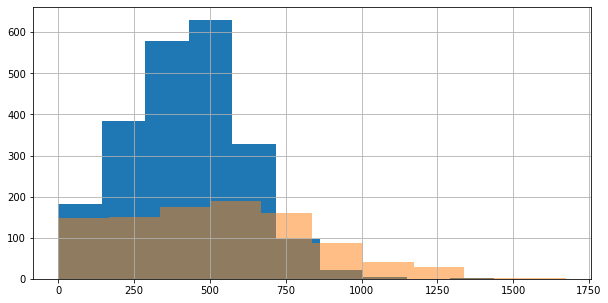

In [73]:
all_data.query('tariff_name == "smart"')['duration_sum'].hist(figsize=(10,5))
all_data.query('tariff_name == "ultra"')['duration_sum'].hist(alpha=0.5)

plt.show()

Гистограмма по количеству израсходованных минут для пользователей тарифа Смарт скошена влево. Это означает, что среди пользователей тарифа Смарт больше тех, кто меньше всех тратит минуты. Но в тоже время пик расхода звонков приходится на диапазон 400-550. В абонентскую плату входит только 500 минут.

Гистограмма по количеству израсходованных минут для пользователей тарифа Смарт скошена враво. Это означает, что среди пользователей тарифа Ультра пребладают те, кто больше тратит минут.

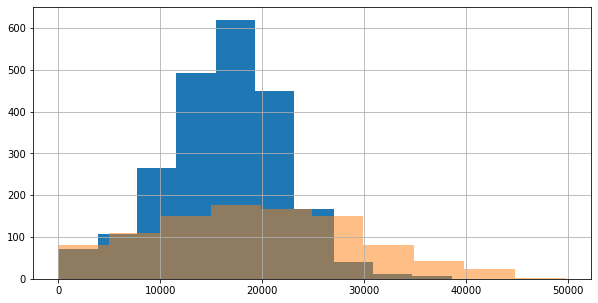

In [74]:
all_data.query('tariff_name == "smart"')['mb_used_sum'].hist(figsize=(10,5))
all_data.query('tariff_name == "ultra"')['mb_used_sum'].hist(alpha=0.5)

plt.show()

Гистограмма по количеству израсходованных Мб для пользователей тарифа Смарт скошена влево. Это означает, что среди пользователей тарифа Смарт больше тех, кто меньше использует интернет. Но в тоже время пик расхода приходится на значение большего, чем входит в абонентскую плату (это 15360 Мб) - примерно от 15000 до 19000 Мб.

Гистограмма по количеству израсходованных Мб для пользователей тарифа Смарт скошена вправо. Это означает, что среди пользователей тарифа Ультра больше тех, кто использует интернет чаще и тратит больше Мб. Но пик расхода интернет- трафика приходится примерно на 15000-20000 Мб, что ниже значения, входящего в абонентскую плату.

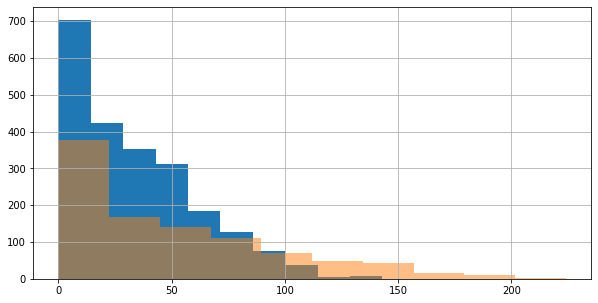

In [75]:
all_data.query('tariff_name == "smart"')['message_count'].hist(figsize=(10,5))
all_data.query('tariff_name == "ultra"')['message_count'].hist(alpha=0.5)

plt.show()

Гистограммы по количеству израсходованных сообщений для пользователей тарифов Смарт и Ультра скошены вправо. Это означает, что среди пользователей больше тех, что пользуется сообщениями в большем объеме, чем остальные.

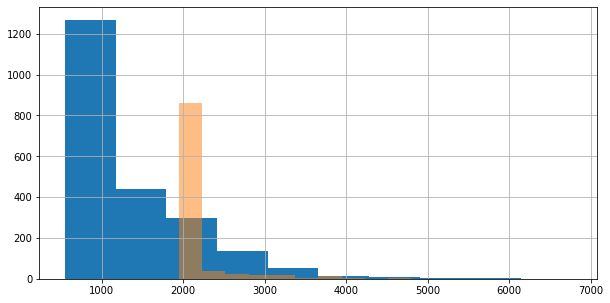

In [76]:
all_data.query('tariff_name == "smart"')['price_per_month'].hist(figsize=(10,5))
all_data.query('tariff_name == "ultra"')['price_per_month'].hist(alpha=0.5)

plt.show()

Гистограммы по суммарной выручки в месяц для пользователей двух тарифов скошена вправо.

Но для пользователей тарифа Смарт пик гистограммы в диапазоне от 500 до 1100р, а для пользователей тарифа Ультра - около 2000р, что приблизительно равно значению абонентской платы.

По скошенности гистограммы можно судить о размещении данных в таблице. Раз гистограмма скошенна вправа, значит медианное значение меньше чем среднее арифметическое, и следовательно, в данных много таких значений, которые показывают, что пользователи платят больше, чем остальные.

Краткий вывод по текущему пункту:
* Расчитали среднее количество, дисперсию и стандартное отклонение по использованию минут, сообщений, трафика и трат в месяц. 

По правилу трех сигм можем получить диапазоны выручки для пользователей тарифов Смарт и Ультра. Так для пользователей тарифа Смарт диапазон будет от 550р( величина абонентской платы) до 3746р. А для пользователей тарифа Ультра диапазон будет от 1950р( величина абонентской платы) до 3200р.В целом получается, что пользователи тарифа Смарт чаще доплачивают за дополнительные расходы.
* Построили гистограммы по расходу сообщений, минут и Мб для пользователей разных тарифов. Гистограммы для пользователей тарифа Ультра смещены вправо, гистограммы для пользователей тарифа Смарт смещены влево, кроме гистограммы расхода сообщений.

Среди пользователей тарифа Смарт больше таких людей, кто использует меньше интернета и звонков, чем остальные. Но среди пользователей тарифа смарт есть такие пользователи, кто использует сообщения больше, чем остальные. Но в тоже время пик расхода звонков приходится на диапазон 400-550. В абонентскую плату входит только 500 минут. А пик расхода интернет-трафика приходится на значение большего, чем входит в абонентскую плату (это 15360 Мб) - примерно от 15000 до 19000 Мб.

Среди пользователей тарифа Ультра преобладает больший расход сообщений, интернет-трафика и сообщений. Но практически все значения расходов не выходят за объем, входящий в абонентскую плату. Пик расхода интернет-трафика примерно в диапазоне 15000-20000 Мб, что не выходит за установленный лимит 30Гб.
* Гистограммы по суммарной выручке в месяц для пользователей двух тарифов смещены вправо. Это означает, что в данных много таких значений, которые показывают, что пользователи платят больше, чем остальные.

Среди пользователей тарифа Смарт больше тех, кто платит за траты сверх абонентской платы.

## Проверка гипотез



### Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

Нулевая гипотеза: средние выручки пользователей тарифа Смарт и тарифа Ультра равны между собой.

Альтернативная гипотеза: средние выручки пользователей тарифов различны.

Нужно исследовать значение прибыли в месяц для всех пользователей, так как нужно узнать, какой из тарифов приносит больше выручки и на основании полученных данных определить более прибыльный тариф.
Для расчета используем метод scipy.stats.ttest_ind(), так как нужно сравнить средние двух генеральных совокупностей между собой. Одна совокупность, это пользователи тарифа Смарт, другая совокупность- пользователи тарифа Ультра.

In [77]:
alpha = .05
results = st.ttest_ind(
    all_data.query('tariff_name == "smart"')['price_per_month'], 
    all_data.query('tariff_name == "ultra"')['price_per_month'],
    equal_var = False)
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 4.2606313931076085e-250
Отвергаем нулевую гипотезу


Нулевую гипотезу стоит отвергуть. Значение pvalue слишком мало, практически равно нулю, чтобы можно было принять нулевую гипотезу.

### средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Нулевая гипотеза: средняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов.

Альтернативная гипотеза: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Нужно исследовать значение прибыли в месяц для всех пользователей, так как нужно узнать, какой из тарифов приносит больше выручки и на основании полученных данных определить более прибыльный тариф.

In [78]:
alpha = .05
results = st.ttest_ind(
    all_data.query('city == "Москва"')['price_per_month'], 
    all_data.query('city != "Москва"')['price_per_month'],
    equal_var = False)
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.5257376663729298
Не получилось отвергнуть нулевую гипотезу


<div class="alert alert-success">
<b>Комментарий с комплиментом ревьюера:</b> 

Ты верно сформулировала Н0 и Н1 гипотезы, это очень важно, использовала правильный метод и получила корректные результаты проверок гипотез.
</div>


Нулевую гипотезу не получится отвергнуть. Значение pvalue больше 50%, это явно слишком большая вероятность, чтобы делать вывод о значимом различии между средними тратами пользователей Москвы и других регионов.

## Вывод

При исследовательском анализе данных были выполнены следующие пункты:
* минуты исходящий звонков, исходящий трафик округлены в большую сторону.
* столбца с датами приведены к фотмату datetime64.
* в исходных данных отсутствуют дубликаты.

Все данные по использованному трафику, минутам и сообщениям были вседены в одну таблицу. Был произведен расчет трат каждого пользователя в месяц.

Пользователей тарифа Ультра почти в два раза меньше, чем пользователей тарифа Смарт.
В среднем пользователи тарифа Ультра используют больше минут, интернет-трафика и сообщений.
В течении года пользователи тарифа Смарт увеличивали потребление минут, интернет-трафика и сообщений. Возможно это связано с увеличением количества клиентов в течении года.
В течении года для пользователей тарифа Ультра не заметен такой сильный рост в потреблении минут, интернет-трафика и сообщений. Возможно количество пользователей тарифа Ультра в течении года несильно изменилось.

* Расчитали среднее количество, дисперсию и стандартное отклонение по использованию минут, сообщений, трафика и трат в месяц. 
Значение средней прибыли для пользователей тарифа Смарт приблизительно равна 1300р, что больше чем в 2 раза больше абонентской платы за этот тариф.
Значение средней прибыли для пользователей тарифа Ультра приблизительно равна 2000р.

* Построили гистограммы по расходу сообщений, минут и Мб для пользователей разных тарифов. Гистограммы для пользователей тарифа Ультра смещены вправо, гистограммы для пользователей тарифа Смарт смещены влево, кроме гистограммы расхода сообщений.

По гистограммам выяснили, что пользователи тарифа Смарт в большем количестве используют минуты в диапазоне 400-550 минут, интернет - в диапазоне от 15000 до 19000 Мб, что больше интернет - трафика, входящего в абонентскую плату.
* Гистограммы по суммарной выручке в месяц для пользователей двух тарифов смещены вправо. Но для пользователей тарифа Смарт пик гистограммы в диапазоне от 500 до 1100р, а для пользователей тарифа Ультра - около 2000р.
Пользователи тарифа Смарт чаще платят больше абонентской платы.

Были проверены две гипотезы:
* средняя выручка пользователей тарифов «Ультра» и «Смарт» равны.
Гипотезу пришлось отвергуть, такая значение pvalue слишком мало, практически равно нулю, чтобы можно было принять нулевую гипотезу.
* средняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов.
Нулевую гипотезу не получится отвергнуть. Значение pvalue больше 50%, это явно слишком большая вероятность, чтобы делать вывод о значимом различии между средними тратами пользователей Москвы и других регионов.

Поэтому в заключение можно отметить, что тариф Смарт более прибыльный, т.к. количество пользователей больше, и среди них большое количество тех, что доплачивает за услуги связи сверх тарифного пакета. А так же пользователи из Москвы в среднем тратят на связь столько же, сколько пользователи из других регионов.